Data shape before clustering: (2788, 2)
Runtime for dbscan_clustering: 0.147353 seconds


TypeError: 'NoneType' object is not subscriptable

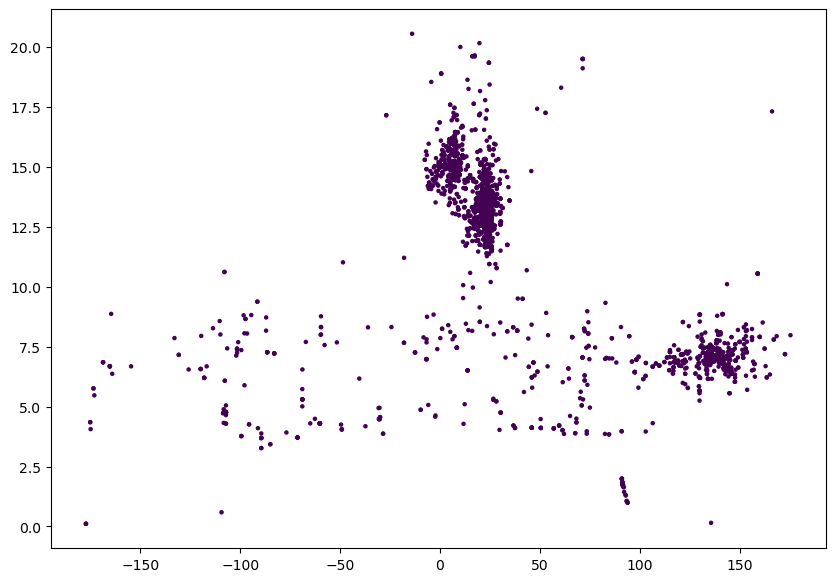

In [2]:
import numpy as np
import cluster_data
import my_kmedoids
from cluster_plotter import ClusterPlotter
from kmeans import k_means
from fuzzy_c_means import fuzzy_c_means
from my_kmedoids import pam_clustering
from DBSCAN import dbscan_clustering
from mean_shift import mean_shift_clustering
import scores
import pandas as pd
from cluster_data import run_clustering

# Load and preprocess data
testfile = r"../input/stat_Master_02_geo_s1.crs"
data = cluster_data.prepare_data_for_clustering(testfile)
data = np.array(data).T
normalized_data, data_min, data_max = cluster_data.normalize_data(data)
k = 3  # Number of clusters

list_alg = ["DBSCAN", "K-medoids fastPAM2 + LAB-build", "K-medoids fastPAM1", "K - Medoids", "K - Means", "Fuzzy C Means"]

# Run clustering algorithms
result_dbscan, time_dbscan = cluster_data.estimate_runtime(dbscan_clustering, normalized_data, eps=0.5, min_samples=5)

# Plot DBSCAN results
unnormalized_data_dbscan, cluster_centers_dbscan = cluster_data.unnormalize(normalized_data, None, data_min, data_max)
plotter_dbscan = ClusterPlotter(unnormalized_data_dbscan, result_dbscan.labels, cluster_centers_dbscan)
plotter_dbscan.clusters_2d_plot("DBSCAN - 2D Cluster Visualization")


result_fastpam2, time_fastpam2, n_clusters_fastpam2, points_per_cluster_fastpam2, metrics_fastpam2 = run_clustering(pam_clustering, "K-medoids fastPAM2 + LAB-build", normalized_data, data_min, data_max, k, plot = True, build_function = my_kmedoids.fastpam_lab_build, swap_function = my_kmedoids.fastpam2_swap)
result_fastpam1, time_fastpam1, n_clusters_fastpam1, points_per_cluster_fastpam1, metrics_fastpam1 = run_clustering(pam_clustering, "K-medoids fastPAM1", normalized_data, data_min, data_max, k, plot = True, build_function = None, swap_function = my_kmedoids.fastpam1_swap)
result_kmedoids, time_kmedoids, n_clusters_kmedoids, points_per_cluster_kmedoids, metrics_kmedoids = run_clustering(pam_clustering, "K-medoids (PAM)", normalized_data, data_min, data_max, k, plot = True, build_function=None, swap_function=None)
result_kmeans, time_kmeans, n_clusters_kmeans, points_per_cluster_kmeans, metrics_kmeans = run_clustering(k_means, "K-means", normalized_data, data_min, data_max, k, plot = True, init='kmeans++')
result_fcm, time_fcm, n_clusters_fcm, points_per_cluster_fcm, metrics_fcm = run_clustering(fuzzy_c_means, "Fuzzy C-means", normalized_data, data_min, data_max, k, plot = True, m=2)


n_clusters_dbscan = ""
points_per_cluster_dbscan = ""
metrics_dbscan = ""
runtimes = [time_dbscan, time_fastpam2, time_fastpam1, time_kmedoids, time_kmeans, time_fcm]
n_clusters = [n_clusters_dbscan, n_clusters_fastpam2, n_clusters_fastpam1, n_clusters_kmedoids, n_clusters_kmeans, n_clusters_fcm]
points_per_clusters = [points_per_cluster_dbscan, points_per_cluster_fastpam2, points_per_cluster_fastpam1, points_per_cluster_kmedoids, points_per_cluster_kmeans, points_per_cluster_fcm]

metrics = [metrics_dbscan, metrics_fastpam2, metrics_fastpam1, metrics_kmedoids, metrics_kmeans, metrics_fcm]
DB_scores = [m[0] for m in metrics]
CH_scores = [m[1] for m in metrics]
dunn_index = [m[2] for m in metrics]
sil_scores = [m[3] for m in metrics]
cluster_2d_std = [m[4] for m in metrics]
square_density = [m[5] for m in metrics]
hull_density = [m[6] for m in metrics]

print("\n--- Runtime Summary ---")
print(f"DBSCAN runtime: {time_dbscan:.6f} seconds")
print(f"K-medoids fastPAM2 + LAB-build runtime: {time_fastpam2:.6f} seconds")
print(f"K-medoids fastPAM1 runtime: {time_fastpam1:.6f} seconds")
print(f"K-medoids (PAM) runtime: {time_kmedoids:.6f} seconds")
print(f"K-means runtime: {time_kmeans:.6f} seconds")
print(f"Fuzzy C-means runtime: {time_fcm:.6f} seconds")

# Unnormalize DBSCAN results
unnormalized_data = cluster_data.unnormalize(normalized_data, None, data_min, data_max)[0]

# Collect all metrics in a list of dictionaries
clustering_results = {
    "Algorithm": ["DBSCAN", "K-medoids fastPAM2 + LAB-build", "K-medoids fastPAM1", "K-medoids (PAM)", "K-means", "Fuzzy C-means"],
    "Clusters": n_clusters,
    "Davies-Bouldin": DB_scores,
    "Silhouette": sil_scores,
    "Calinski-Harabasz": CH_scores,
    "Dunn Index": dunn_index,
    "Runtime (s)": runtimes
}

df_results = pd.DataFrame(clustering_results)
df_results.to_csv("clustering_results.csv", index=False)
print("\nClustering results have been saved to 'clustering_results.csv'")


Data shape before clustering: (2788, 2)
Runtime for dbscan_clustering: 0.058401 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\clustering\cluster_plotter.py:92: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


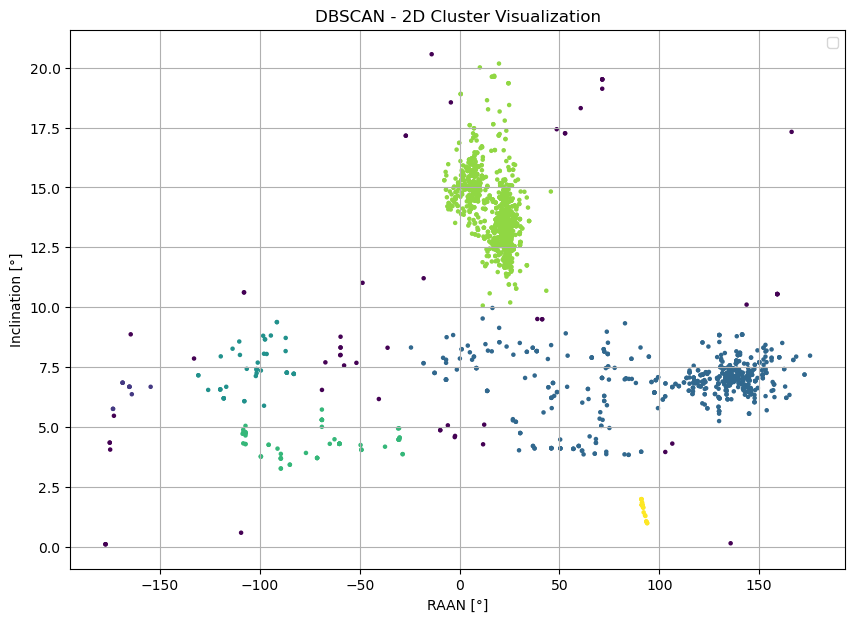

In [8]:
# Plot DBSCAN results
eps = 0.05
min = 10
result_dbscan, time_dbscan = cluster_data.estimate_runtime(dbscan_clustering, normalized_data, eps=eps, min_samples=min)
unnormalized_data_dbscan, _ = cluster_data.unnormalize(normalized_data, None, data_min, data_max)
plotter_dbscan = ClusterPlotter(unnormalized_data_dbscan, result_dbscan.labels, result_dbscan.labels)  # No cluster centers
plotter_dbscan.clusters_2d_plot("DBSCAN - 2D Cluster Visualization", show_centers=False)

In [ ]:
import numpy as np
import cluster_data
import my_kmedoids
from cluster_plotter import ClusterPlotter
from kmeans import k_means
from fuzzy_c_means import fuzzy_c_means
from my_kmedoids import pam_clustering
from DBSCAN import dbscan_clustering
from mean_shift import mean_shift_clustering
import scores
import pandas as pd
from cluster_data import run_clustering
from tqdm import tqdm

# Load and preprocess data
testfile = r"../input/stat_Master_02_geo_s1.crs"
data = cluster_data.prepare_data_for_clustering(testfile)
data = np.array(data).T
normalized_data, data_min, data_max = cluster_data.normalize_data(data)
k = 3  # Number of clusters

# Define clustering algorithms and parameters
algorithms = [
    ("DBSCAN", dbscan_clustering, {"eps": 0.01, "min_samples": 10}),
    ("K-medoids fastPAM2 + LAB-build", pam_clustering, {"k": k, "plot": True, "build_function": my_kmedoids.fastpam_lab_build, "swap_function": my_kmedoids.fastpam2_swap}),
    ("K-medoids fastPAM1", pam_clustering, {"k": k, "plot": True, "build_function": None, "swap_function": my_kmedoids.fastpam1_swap}),
    ("K-medoids (PAM)", pam_clustering, {"k": k, "plot": True, "build_function": None, "swap_function": None}),
    ("K-means", k_means, {"k": k, "plot": True, "init": 'kmeans++'}),
    ("Fuzzy C-means", fuzzy_c_means, {"k": k, "plot": True, "m": 2})
]

# Run clustering algorithms with progress bar
results = []
for name, func, params in tqdm(algorithms, desc="Running Clustering Algorithms"):
    if "k" in params:
        k_value = params.pop("k")
        results.append((name, run_clustering(func, name, normalized_data, data_min, data_max, k_value, **params)))
    else:
        results.append((name, run_clustering(func, name, normalized_data, data_min, data_max, **params)))

# Collect results
metrics = {}
for algo_name, (result, runtime, n_clusters, points_per_cluster, metric_values) in results:
    metrics[algo_name] = {
        "Runtime (s)": runtime,
        "Clusters": n_clusters,
        "Davies-Bouldin": metric_values[0],
        "Silhouette": metric_values[3],
        "Calinski-Harabasz": metric_values[1],
        "Dunn Index": metric_values[2],
    }

# Convert results to DataFrame
df_results = pd.DataFrame.from_dict(metrics, orient="index")
df_results.to_csv("clustering_results.csv", index=True)
print("\nClustering results have been saved to 'clustering_results.csv'")